In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns
import math
import statistics
import warnings
import numpy as  np
import ast
warnings.filterwarnings('ignore')
data_files = glob.glob(r'../Squircle experiment/data/*.json')
# Load the dataset
df = pd.DataFrame()
for i in range(len(data_files)):
    temp_df = pd.read_json(data_files[i])
    temp_df['previous_response'] = temp_df['choice'].shift(fill_value=None)
    df = pd.concat([df, temp_df])
df = df.drop(df.columns[df.columns.str.contains('Unnamed', case=False)], axis=1)
# select only the main task
df = df[(df['block_number'] != 'Training')]
### TEMPORARY ###
df = pd.read_json(r"C:\Users\veoni\Documents\GitHub\MTE_DLAB\Squircle experiment\DF_clean.json")
####################
# extracting sample size
n = len(set(df.pt_num))

In [2]:
df_acc = df[(df['difficulty'] != 'Control') & (df['acc'] != 'Control') & (df['acc'] != 'NAN')]

# Convert 'acc' column to 1 for True and 0 for False
df_acc['acc'] = df_acc['acc'].astype(int)

# Calculate average accuracy and reaction time by difficulty level
avg_stats = df_acc.groupby(['difficulty', 'true_value'] ).agg({'acc': 'mean', 'rt': 'mean'}).reset_index()
print(avg_stats)

  difficulty true_value       acc        rt
0       Easy       Blue  0.864674  0.460808
1       Easy        Red  0.841806  0.467413
2       Hard       Blue  0.715600  0.480877
3       Hard        Red  0.667774  0.493310
4     Medium       Blue  0.785950  0.471630
5     Medium        Red  0.752135  0.478263


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


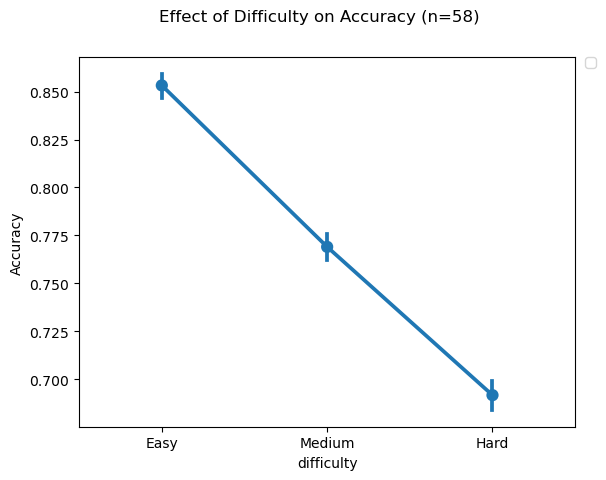

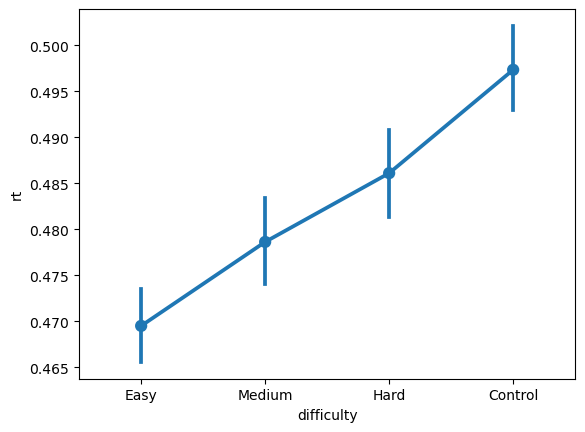

In [3]:
import pandas as pd

# Load the dataset
# Exclude rows where 'control' appears in either 'difficulty' or 'acc' column

df_acc = df[(df['difficulty'] != 'Control') & (df['acc'] != 'Control') & (df['acc'] != 'NAN')]



# Convert 'acc' column to 1 for True and 0 for False
df_acc['acc'] = df_acc['acc'].astype(int)

# Drop the 'Unnamed: 0' column
df = df.drop('Unnamed: 0', axis=1, errors='ignore')

# checking the effect of masking
# for each measure of performance separately
for dv in ['acc']:
    if dv == 'rt':
        data = df[df['acc'] == 1]  # only take correct trials for RT
    elif dv == 'acc':
        data = df_acc

    # Rest of your analysis code
    plt.figure()
    plot = sns.pointplot(
        data=data,
        y=dv,
        x='difficulty',
        order=['Easy', 'Medium', 'Hard'],
        join=True

    )
    if dv == 'acc':
        plt.ylabel("Accuracy")
        plt.suptitle("Effect of Difficulty on Accuracy (n={})".format(n))
    elif dv == 'rt':
        plt.ylabel("Reaction Time")
        plt.suptitle("Effect of Difficulty on Reaction Time (n={})".format(n))
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

plt.figure()
plot = sns.pointplot(
    data=df[(df['acc'] == True) | (df['acc'] == 'Control')],
    y='rt',
    x='difficulty',
    order=['Easy', 'Medium', 'Hard', "Control"],
    join=True

)

In [4]:
df = df[(df['block_number'] != 'Training')]
#df = df.reset_index()
#part below is necessary if you are reading it from csv or xlsx file not for pkl or json
"""
error_tri = []
for i in range(len(df)):
    try:
        df['downsampled_traj'].iloc[i] = ast.literal_eval(df['downsampled_traj'].iloc[i])
    except (ValueError, SyntaxError) as e:
        error_tri.append(i)
        print(f"Error at index {i}: {e}")
        continue
"""
# Now, 'downsampled_traj' column contains lists of tuples
    
# Now, 'downsampled_traj' column contains lists of tuples
df_blue = df[df['choice'] == 'Blue']
df_red = df[df['choice'] == 'Red']
#df_blue = df_blue.reset_index()
#df_red = df_red.reset_index()

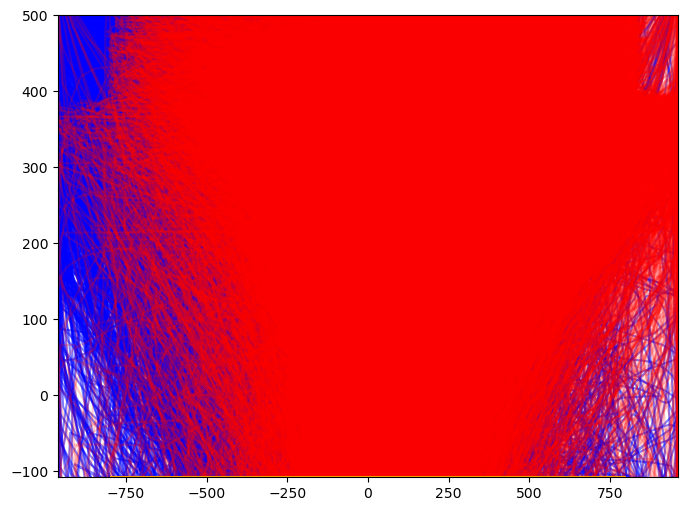

In [5]:

plt.figure(figsize=(8, 6))
for z in range(len(df_blue)):
    x_coords = [pos[0] for pos in df_blue['downsampled_traj'].iloc[z]]
    y_coords = [pos[1] for pos in df_blue['downsampled_traj'].iloc[z]]

    plt.plot(x_coords, y_coords, label='Mouse Trajectory', color='blue',alpha = 0.5)

for b in range(len(df_red)):
    x_red_coords = [pos[0] for pos in df_red['downsampled_traj'].iloc[b]]
    y_red_coords = [pos[1] for pos in df_red['downsampled_traj'].iloc[b]]
    
    # Create a new figure
   
    
    # Plot the mouse trajectory
   
    plt.plot(x_red_coords, y_red_coords, label='Mouse Trajectory', color='red', alpha = 0.2)
    #plt.scatter(x_coords, y_coords, color='red', s=4, label='Mouse Positions')
    
    
    # Add labels and title
    #plt.xlabel('X Position')
    #plt.ylabel('Y Position')
    #plt.title('Mouse Trajectory')
    
    # Set x-axis limits to show the left side of the screen
    
plt.xlim(-960, 960)
plt.ylim(-108, 500)  # Assuming max(x_coords) is the rightmost position
plt.hlines(-108, xmin = -800 , xmax =800, colors= 'orange')
# Add legend
#plt.legend()

# Show the plot
plt.show()


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_blue and df_red are your DataFrames for blue and red trajectories

# Define a function to prune the trajectories
def prune_trajectory(df):
    pruned_data = []
    for traj in df['downsampled_traj']:
        pruned_traj_x = [pos[0] for pos in traj if pos[1] >= -108]
        pruned_traj_y = [pos[1] for pos in traj if pos[1] >= -108]
        pruned_data.append((pruned_traj_x, pruned_traj_y))
    return pruned_data

# Apply the pruning function to your DataFrames
pruned_blue_data = prune_trajectory(df_blue)
pruned_red_data = prune_trajectory(df_red)

# Plot the pruned trajectories
plt.figure(figsize=(8, 6))

for x_coords, y_coords in pruned_blue_data:
    plt.plot(x_coords, y_coords, label='Mouse Trajectory (Blue)', color='blue', alpha=0.5)

for x_red_coords, y_red_coords in pruned_red_data:
    plt.plot(x_red_coords, y_red_coords, label='Mouse Trajectory (Red)', color='red', alpha=0.2)

# Set x-axis limits
plt.xlim(-960, 960)
plt.ylim(-108, 500)

# Add a horizontal line at y = -108
plt.hlines(-108, xmin=-800, xmax=800, colors='orange')

# Add legend
plt.legend()

# Show the plot
plt.show()

KeyboardInterrupt: 

In [12]:
pruned_blue_data

[[[-95.0, -70.3333333333],
  [-95.0, -13.6666666667],
  [-95.0, 41.2142857143],
  [-93.4285714286, 77.2142857143],
  [-86.3846153846, 107.9230769231],
  [-77.5833333333, 138.0833333333],
  [-70.1818181818, 165.7272727273],
  [-61.6666666667, 185.6666666667],
  [-54.6, 201.8],
  [-38.4285714286, 224.1428571429],
  [-28.1666666667, 243.3333333333],
  [-23.5, 256.0],
  [-20.2857142857, 266.1428571429],
  [-17.3333333333, 273.6666666667],
  [-14.1538461538, 282.5384615385],
  [-12.6666666667, 290.0],
  [-10.6666666667, 295.6666666667],
  [-2.8333333333, 305.0833333333],
  [7.3333333333, 313.9166666667],
  [13.1538461538, 319.1538461538],
  [15.9090909091, 321.0],
  [16.0, 321.0],
  [16.0, 321.0],
  [15.3333333333, 324.3333333333],
  [-14.0, 340.8181818182],
  [-82.1538461538, 360.6923076923],
  [-195.6666666667, 391.5],
  [-306.3333333333, 414.8333333333],
  [-403.5, 430.0],
  [-476.6153846154, 440.8461538462],
  [-556.6666666667, 452.0],
  [-656.6666666667, 462.6666666667],
  [-755.0, 468

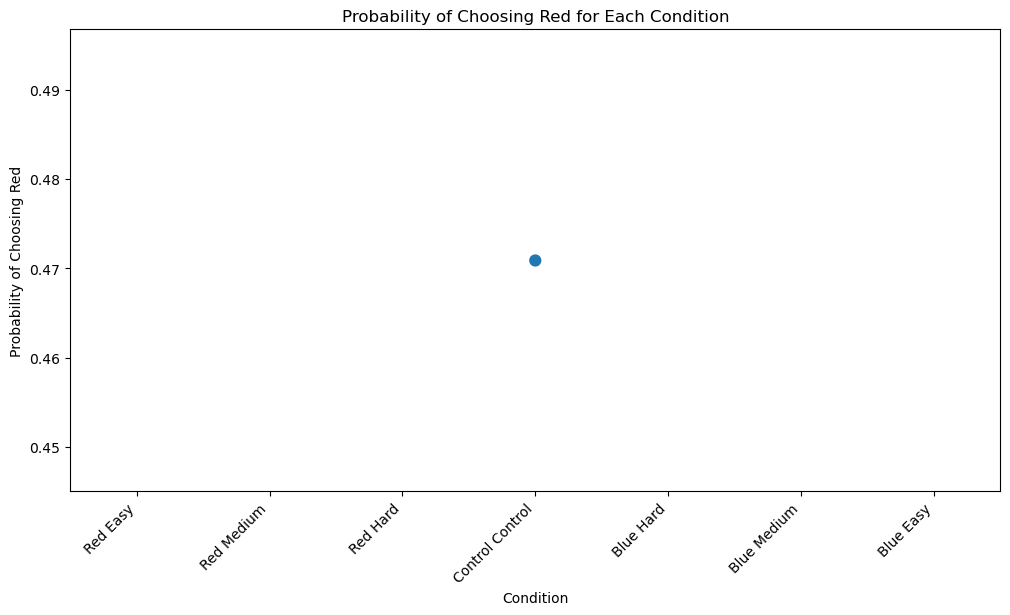

In [6]:
conditions = [
    ('Easy', 'Red'),
    ('Medium', 'Red'),
    ('Hard', 'Red'),
    ('Control', 'Control'),
    ('Hard', 'Blue'),
    ('Medium', 'Blue'),
    ('Easy', 'Blue')
]

plt.figure(figsize=(12, 6))

subset_data_list = []

for i, (difficulty, true_color) in enumerate(conditions, 1):
    subset_data = df[(df['difficulty'] == difficulty) & (df['true_value'] == true_color)]
    probabilities = subset_data['choice'].value_counts(normalize=True).get('Red', 0)
    
    subset_data_list.append({'Condition': f'{difficulty} {true_color}', 'Probability of Red': probabilities})

# Create a DataFrame from the list
plot_data = pd.DataFrame(subset_data_list)

# Plotting using sns.barplot
sns.pointplot(x='Condition', y='Probability of Red', data=plot_data, order=[c[-1] + ' ' + c[-2] for c in conditions])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.title('Probability of Choosing Red for Each Condition')
plt.xlabel('Condition')
plt.ylabel('Probability of Choosing Red')
plt.show()

In [7]:
plot_data

,Condition,Probability of Red
0,Easy Red,0.841806
1,Medium Red,0.752135
2,Hard Red,0.667774
3,Control Control,0.470877
4,Hard Blue,0.284400
5,Medium Blue,0.214050
6,Easy Blue,0.135326


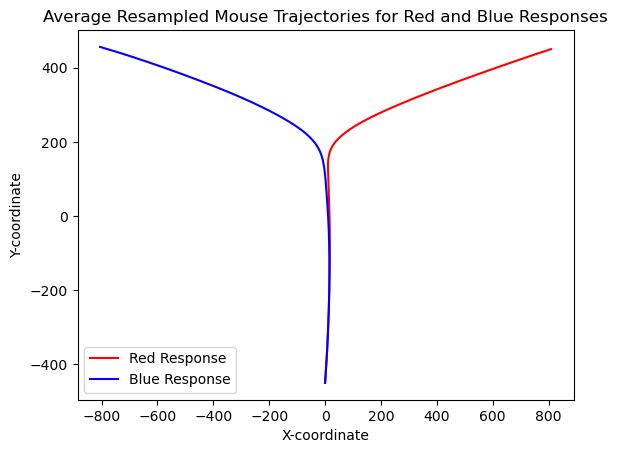

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
#red_trajectories = [...]  # List of mouse trajectories for red responses
red_trajectories = df_red['downsampled_traj'] # List of mouse trajectories for red responses
blue_trajectories = df_blue['downsampled_traj']  # List of mouse trajectories for blue responses
# Find the maximum length of trajectories
max_length = max(len(traj) for traj in red_trajectories)

# Initialize an array to store the resampled trajectories
resampled_red_trajectories = []

# Resample each trajectory to have the same length
for traj in red_trajectories:
    x, y = zip(*traj)
    x = np.array(x)
    y = np.array(y)
    new_x = np.linspace(0, len(traj) - 1, max_length)
    resampled_traj_x = np.interp(new_x, np.arange(len(traj)), x)
    resampled_traj_y = np.interp(new_x, np.arange(len(traj)), y)
    resampled_traj = list(zip(resampled_traj_x, resampled_traj_y))
    resampled_red_trajectories.append(resampled_traj)

# Convert the list of resampled trajectories to a numpy array
resampled_red_trajectories = np.array(resampled_red_trajectories)

# Compute the average resampled trajectory for red responses
red_average_trajectory = np.mean(resampled_red_trajectories, axis=0)


# Find the maximum length of trajectories
max_length = max(len(traj) for traj in blue_trajectories)

# Initialize an array to store the resampled trajectories
resampled_blue_trajectories = []

# Resample each trajectory to have the same length
for traj in blue_trajectories:
    x, y = zip(*traj)
    x = np.array(x)
    y = np.array(y)
    new_x = np.linspace(0, len(traj) - 1, max_length)
    resampled_traj_x = np.interp(new_x, np.arange(len(traj)), x)
    resampled_traj_y = np.interp(new_x, np.arange(len(traj)), y)
    resampled_traj = list(zip(resampled_traj_x, resampled_traj_y))
    resampled_blue_trajectories.append(resampled_traj)

# Convert the list of resampled trajectories to a numpy array
resampled_blue_trajectories = np.array(resampled_blue_trajectories)

# Compute the average resampled trajectory for blue responses
blue_average_trajectory = np.mean(resampled_blue_trajectories, axis=0)

# Plot the average resampled trajectory for red and blue responses
plt.plot(red_average_trajectory[:, 0], red_average_trajectory[:, 1], label='Red Response', color='red')
plt.plot(blue_average_trajectory[:, 0], blue_average_trajectory[:, 1], label='Blue Response', color='blue')

# Customize the plot as needed
plt.title('Average Resampled Mouse Trajectories for Red and Blue Responses')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()
plt.show()

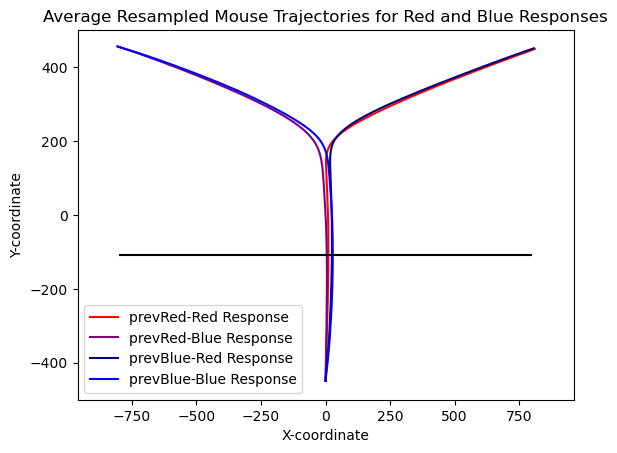

In [9]:
df_prev_red = df[df['previous_response'] == 'Blue']
df_prev_blue = df[df['previous_response'] == 'Red']
df_prev_red_red = df_prev_red[df_prev_red['choice'] == 'Red']
df_prev_red_blue = df_prev_red[df_prev_red['choice'] == 'Blue']
df_prev_blue_red = df_prev_blue[df_prev_blue['choice'] == 'Red']
df_prev_blue_blue = df_prev_blue[df_prev_blue['choice'] == 'Blue']
#df_red = df[df['choice'] == 'Red']
# Example data (replace with your actual data)
#red_trajectories = [...]  # List of mouse trajectories for red responses
prev_red_red_trajectories = df_prev_red_red['downsampled_traj'] # List of mouse trajectories for red responses
prev_red_blue_trajectories = df_prev_red_blue['downsampled_traj']
prev_blue_red_trajectories = df_prev_blue_red['downsampled_traj']
prev_blue_blue_trajectories = df_prev_blue_blue['downsampled_traj']

###################################################################

#blue_trajectories = df_blue['downsampled_traj']  # List of mouse trajectories for blue responses
# Find the maximum length of trajectories
max_length = max(len(traj) for traj in prev_red_red_trajectories)

# Initialize an array to store the resampled trajectories
resampled_red_trajectories = []

# Resample each trajectory to have the same length
for traj in prev_red_red_trajectories:
    x, y = zip(*traj)
    x = np.array(x)
    y = np.array(y)
    new_x = np.linspace(0, len(traj) - 1, max_length)
    resampled_traj_x = np.interp(new_x, np.arange(len(traj)), x)
    resampled_traj_y = np.interp(new_x, np.arange(len(traj)), y)
    resampled_traj = list(zip(resampled_traj_x, resampled_traj_y))
    resampled_red_trajectories.append(resampled_traj)

# Convert the list of resampled trajectories to a numpy array
resampled_red_trajectories = np.array(resampled_red_trajectories)

# Compute the average resampled trajectory for red responses
red_red_average_trajectory = np.mean(resampled_red_trajectories, axis=0)

#####################################################################

# Find the maximum length of trajectories
max_length = max(len(traj) for traj in prev_red_blue_trajectories)

# Initialize an array to store the resampled trajectories
resampled_red_trajectories = []

# Resample each trajectory to have the same length
for traj in prev_red_blue_trajectories:
    x, y = zip(*traj)
    x = np.array(x)
    y = np.array(y)
    new_x = np.linspace(0, len(traj) - 1, max_length)
    resampled_traj_x = np.interp(new_x, np.arange(len(traj)), x)
    resampled_traj_y = np.interp(new_x, np.arange(len(traj)), y)
    resampled_traj = list(zip(resampled_traj_x, resampled_traj_y))
    resampled_red_trajectories.append(resampled_traj)

# Convert the list of resampled trajectories to a numpy array
resampled_red_trajectories = np.array(resampled_red_trajectories)

# Compute the average resampled trajectory for red responses
red_blue_average_trajectory = np.mean(resampled_red_trajectories, axis=0)

######################################################################

# Find the maximum length of trajectories
max_length = max(len(traj) for traj in prev_blue_red_trajectories)

# Initialize an array to store the resampled trajectories
resampled_blue_trajectories = []

# Resample each trajectory to have the same length
for traj in prev_blue_red_trajectories:
    x, y = zip(*traj)
    x = np.array(x)
    y = np.array(y)
    new_x = np.linspace(0, len(traj) - 1, max_length)
    resampled_traj_x = np.interp(new_x, np.arange(len(traj)), x)
    resampled_traj_y = np.interp(new_x, np.arange(len(traj)), y)
    resampled_traj = list(zip(resampled_traj_x, resampled_traj_y))
    resampled_blue_trajectories.append(resampled_traj)

# Convert the list of resampled trajectories to a numpy array
resampled_blue_trajectories = np.array(resampled_blue_trajectories)

# Compute the average resampled trajectory for blue responses
blue_red_average_trajectory = np.mean(resampled_blue_trajectories, axis=0)

#######################################################################

# Find the maximum length of trajectories
max_length = max(len(traj) for traj in prev_blue_blue_trajectories)

# Initialize an array to store the resampled trajectories
resampled_blue_trajectories = []

# Resample each trajectory to have the same length
for traj in prev_blue_blue_trajectories:
    x, y = zip(*traj)
    x = np.array(x)
    y = np.array(y)
    new_x = np.linspace(0, len(traj) - 1, max_length)
    resampled_traj_x = np.interp(new_x, np.arange(len(traj)), x)
    resampled_traj_y = np.interp(new_x, np.arange(len(traj)), y)
    resampled_traj = list(zip(resampled_traj_x, resampled_traj_y))
    resampled_blue_trajectories.append(resampled_traj)

# Convert the list of resampled trajectories to a numpy array
resampled_blue_trajectories = np.array(resampled_blue_trajectories)

# Compute the average resampled trajectory for blue responses
blue_blue_average_trajectory = np.mean(resampled_blue_trajectories, axis=0)

#############################################################################

# Plot the average resampled trajectory for red and blue responses
plt.plot(red_red_average_trajectory[:, 0], red_red_average_trajectory[:, 1], label='prevRed-Red Response', color='red')
plt.plot(red_blue_average_trajectory[:, 0], red_blue_average_trajectory[:, 1], label='prevRed-Blue Response', color='purple')
plt.plot(blue_red_average_trajectory[:, 0], blue_red_average_trajectory[:, 1], label='prevBlue-Red Response', color='navy')
plt.plot(blue_blue_average_trajectory[:, 0], blue_blue_average_trajectory[:, 1], label='prevBlue-Blue Response', color='blue')
plt.xlim(-960, 960)
plt.ylim(-500, 500)
plt.hlines(-108, xmin = -800 , xmax =800, colors= 'black')
# Customize the plot as needed
plt.title('Average Resampled Mouse Trajectories for Red and Blue Responses')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()
plt.show()

ValueError: Columns must be same length as key

In [ ]:
df_comp = df[['pt_num','trial_nbr','block_number', 'acc', 'choice', 'true_value', 'difficulty', 'rt', 'previous_response', 'downsampled_traj', 'timestamps']].copy()

In [ ]:
df_comp

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df_comp
# Make sure you have seaborn and matplotlib installed: pip install seaborn matplotlib

# Set the style of seaborn
sns.set(style="whitegrid")

# Get unique participant numbers from the DataFrame and sort them
participant_numbers = sorted(df_comp['pt_num'].unique())

# Loop through each participant
for participant_num in participant_numbers:
    # Filter the DataFrame for the current participant
    participant_data = df_comp[df_comp['pt_num'] == participant_num]

    # Create a pointplot for the current participant
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    sns.scatterplot(x="trial_nbr", y="rt", data=participant_data, markers="x", linestyles="-")

    # Set labels and title
    plt.xlabel("Trial Number")
    plt.ylabel("Reaction Time (rt)")
    plt.ylim(0, 5)
    plt.title(f"Reaction Time by Trial Number - Participant {participant_num}")

    # Show the plot
    plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df_comp
# Make sure you have seaborn and matplotlib installed: pip install seaborn matplotlib

# Set the style of seaborn
sns.set(style="whitegrid")

# Get unique participant numbers from the DataFrame and sort them
participant_numbers = sorted(df_comp['pt_num'].unique())

# Specify the number of columns for the subplot grid
num_columns = 2

# Calculate the number of rows needed based on the number of participants
num_rows = (len(participant_numbers) + num_columns - 1) // num_columns

# Create subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 6 * num_rows))

# Flatten the axes array to handle the case when there is only one row
axes = axes.flatten()

# Loop through each participant
for i, participant_num in enumerate(participant_numbers):
    # Filter the DataFrame for the current participant
    participant_data = df_comp[df_comp['pt_num'] == participant_num]

    # Calculate the average accuracy per block for the current participant
    avg_accuracy_per_block = participant_data.groupby('block_number')['acc'].mean().reset_index()

    # Create a pointplot for the current participant on the appropriate subplot
    sns.pointplot(x="block_number", y="acc", data=avg_accuracy_per_block, markers="o", linestyles="-", ax=axes[i])

    # Set labels and title for the subplot
    axes[i].set_xlabel("Block Number")
    axes[i].set_ylabel("Average Accuracy")
    axes[i].set_ylim(0, 1)  # Assuming accuracy values are between 0 and 1
    axes[i].set_title(f"Participant {participant_num}")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Assuming your DataFrame is named df_comp
# Make sure you have seaborn and matplotlib installed: pip install seaborn matplotlib

# Set the style of seaborn
sns.set(style="whitegrid")

# Get unique participant numbers from the DataFrame and sort them
participant_numbers = sorted(df_comp['pt_num'].unique())

# Loop through each participant
for participant_num in participant_numbers:
    # Filter the DataFrame for the current participant
    participant_data = df_comp[df_comp['pt_num'] == participant_num]

    # Calculate the average accuracy and 'Red' choice ratio per block for the current participant
    avg_accuracy_per_block = participant_data.groupby('block_number')['acc'].mean().reset_index()
    red_choice_ratio_per_block = (participant_data[participant_data['choice'] == 'Red']
                                  .groupby('block_number')['choice']
                                  .count() / participant_data.groupby('block_number')['choice'].count()).reset_index()

    # Extract and sort the numeric part of block numbers
    avg_accuracy_per_block['block_number'] = avg_accuracy_per_block['block_number'].apply(lambda x: int(re.search(r'\d+', x).group()))
    red_choice_ratio_per_block['block_number'] = red_choice_ratio_per_block['block_number'].apply(lambda x: int(re.search(r'\d+', x).group()))

    # Sort the DataFrame by block number
    avg_accuracy_per_block = avg_accuracy_per_block.sort_values(by='block_number')
    red_choice_ratio_per_block = red_choice_ratio_per_block.sort_values(by='block_number')

    # Create a figure with dual y-axes
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot average accuracy on the primary y-axis
    sns.pointplot(x="block_number", y="acc", data=avg_accuracy_per_block, markers="o", linestyles="-", color='blue', ax=ax1, join = False)

    # Set labels and title for the primary y-axis
    ax1.set_xlabel("Block Number")
    ax1.set_ylabel("Average Accuracy", color='blue')
    ax1.set_ylim(0, 1)  # Assuming accuracy values are between 0 and 1
    ax1.tick_params(axis='y', labelcolor='blue')

    # Create a secondary y-axis for 'Red' choice ratio
    ax2 = ax1.twinx()
    sns.pointplot(x="block_number", y="choice", data=red_choice_ratio_per_block, markers="x", linestyles="--", color='red', ax=ax2, join = False)

    # Set labels and title for the secondary y-axis
    ax2.set_ylabel("'Red' Choice Ratio", color='red')
    ax2.set_ylim(0, 1)  # Assuming choice ratio values are between 0 and 1
    ax2.tick_params(axis='y', labelcolor='red')

    # Set the title for the entire plot
    plt.title(f"Avg Accuracy and 'Red' Choice Ratio per Block - Participant {participant_num}")

    # Show the plot
    plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Assuming your DataFrame is named df_comp
# Make sure you have seaborn and matplotlib installed: pip install seaborn matplotlib

# Set the style of seaborn
sns.set(style="whitegrid")

# Get unique participant numbers from the DataFrame and sort them
participant_numbers = sorted(df_comp['pt_num'].unique())

# Set up subplots
fig, axs = plt.subplots(nrows=len(participant_numbers), ncols=2, figsize=(15, 6 * len(participant_numbers)))

# Loop through each participant
for i, participant_num in enumerate(participant_numbers):
    # Filter the DataFrame for the current participant
    participant_data = df_comp[df_comp['pt_num'] == participant_num]

    # Calculate the average accuracy and 'Red' choice ratio per block for the current participant
    avg_accuracy_per_block = participant_data.groupby('block_number')['acc'].mean().reset_index()
    red_choice_ratio_per_block = (participant_data[participant_data['choice'] == 'Red']
                                  .groupby('block_number')['choice']
                                  .count() / participant_data.groupby('block_number')['choice'].count()).reset_index()

    # Extract and sort the numeric part of block numbers
    avg_accuracy_per_block['block_number'] = avg_accuracy_per_block['block_number'].apply(lambda x: int(re.search(r'\d+', x).group()))
    red_choice_ratio_per_block['block_number'] = red_choice_ratio_per_block['block_number'].apply(lambda x: int(re.search(r'\d+', x).group()))

    # Sort the DataFrame by block number
    avg_accuracy_per_block = avg_accuracy_per_block.sort_values(by='block_number')
    red_choice_ratio_per_block = red_choice_ratio_per_block.sort_values(by='block_number')

    # Plot 1: Average Accuracy and 'Red' Choice Ratio per Block
    sns.pointplot(x="block_number", y="acc", data=avg_accuracy_per_block, markers="o", linestyles="-", color='blue', ax=axs[i, 0], join=False)
    axs[i, 0].set_xlabel("Block Number")
    axs[i, 0].set_ylabel("Average Accuracy", color='blue')
    axs[i, 0].set_ylim(0, 1)  # Assuming accuracy values are between 0 and 1
    axs[i, 0].tick_params(axis='y', labelcolor='blue')

    sns.pointplot(x="block_number", y="choice", data=red_choice_ratio_per_block, markers="x", linestyles="--", color='red', ax=axs[i, 0], join=False)
    axs[i, 0].set_ylabel("'Red' Choice Ratio", color='red')
    axs[i, 0].set_ylim(0, 1)  # Assuming choice ratio values are between 0 and 1
    axs[i, 0].tick_params(axis='y', labelcolor='red')
    axs[i, 0].set_title(f"Avg Accuracy and 'Red' Choice Ratio per Block - Participant {participant_num}")

    # Plot 2: Reaction Time by Trial Number
    sns.scatterplot(x="trial_nbr", y="rt", data=participant_data, markers="x", linestyles="-", ax=axs[i, 1])
    axs[i, 1].set_xlabel("Trial Number")
    axs[i, 1].set_ylabel("Reaction Time (rt)")
    axs[i, 1].set_ylim(0, 5)
    axs[i, 1].set_title(f"Reaction Time by Trial Number - Participant {participant_num}")

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Assuming your DataFrame is named df_comp
# Make sure you have seaborn and matplotlib installed: pip install seaborn matplotlib
df_comp = df_comp[(df_comp['acc'] != 'Control')]
# Set the style of seaborn
sns.set(style="whitegrid")

# Get unique participant numbers from the DataFrame and sort them
participant_numbers = sorted(df_comp['pt_num'].unique())

# Loop through each participant
for i, participant_num in enumerate(participant_numbers):
    # Filter the DataFrame for the current participant
    participant_data = df_comp[df_comp['pt_num'] == participant_num]

    # Calculate the average accuracy and 'Red' choice ratio per block for the current participant
    avg_accuracy_per_block = participant_data.groupby('block_number')['acc'].mean().reset_index()
    red_choice_ratio_per_block = (participant_data[participant_data['choice'] == 'Red']
                                  .groupby('block_number')['choice']
                                  .count() / participant_data.groupby('block_number')['choice'].count()).reset_index()

    # Extract and sort the numeric part of block numbers
    avg_accuracy_per_block['block_number'] = avg_accuracy_per_block['block_number'].apply(lambda x: int(re.search(r'\d+', x).group()))
    red_choice_ratio_per_block['block_number'] = red_choice_ratio_per_block['block_number'].apply(lambda x: int(re.search(r'\d+', x).group()))

    # Sort the DataFrame by block number
    avg_accuracy_per_block = avg_accuracy_per_block.sort_values(by='block_number')
    red_choice_ratio_per_block = red_choice_ratio_per_block.sort_values(by='block_number')

    # Plot 1: Average Accuracy and 'Red' Choice Ratio per Block
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    sns.pointplot(x="block_number", y="acc", data=avg_accuracy_per_block, markers="o", linestyles="-", color='blue', ax=axs[i, 0], join=False)
    axs[0, i].set_xlabel("Block Number")
    axs[0, i].set_ylabel("Average Accuracy", color='blue')
    axs[0, i].set_ylim(0, 1)  # Assuming accuracy values are between 0 and 1
    axs[0, i].tick_params(axis='y', labelcolor='blue')

    sns.pointplot(x="block_number", y="choice", data=red_choice_ratio_per_block, markers="x", linestyles="--", color='red', ax=axs[i, 0], join=False)
    axs[0, i].set_ylabel("'Red' Choice Ratio", color='red')
    axs[0, i].set_ylim(0, 1)  # Assuming choice ratio values are between 0 and 1
    axs[0, i].tick_params(axis='y', labelcolor='red')
    axs[0, i].set_title(f"Avg Accuracy and 'Red' Choice Ratio per Block - Participant {participant_num}")

    # Plot 2: Reaction Time by Trial Number
    sns.scatterplot(x="trial_nbr", y="rt", data=participant_data, markers="x", linestyles="-", ax=axs[i, 1])
    axs[1, 1].set_xlabel("Trial Number")
    axs[1, 1].set_ylabel("Reaction Time (rt)")
    axs[1, 1].set_ylim(0, 5)
    axs[1, 1].set_title(f"Reaction Time by Trial Number - Participant {participant_num}")

    # Adjust layout
    #plt.tight_layout()

    # Save the figure to a PDF file
    #plt.savefig(f'participant_{participant_num}_plots.pdf')

    # Close the figure to free up resources
    #plt.close()

In [ ]:
set(df_comp['rt'])

In [ ]:
df_comp

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Assuming your DataFrame is named df_comp
# Make sure you have seaborn and matplotlib installed: pip install seaborn matplotlib

# Set the style of seaborn
sns.set(style="whitegrid")

# Get unique participant numbers from the DataFrame and sort them
participant_numbers = sorted(df_comp['pt_num'].unique())

# Loop through each participant
for i, participant_num in enumerate(participant_numbers):
    # Filter the DataFrame for the current participant
    participant_data = df_comp[df_comp['pt_num'] == participant_num]

    # Calculate the average accuracy and 'Red' choice ratio per block for the current participant
    avg_accuracy_per_block = participant_data.groupby('block_number')['acc'].mean().reset_index()
    red_choice_ratio_per_block = (participant_data[participant_data['choice'] == 'Red']
                                  .groupby('block_number')['choice']
                                  .count() / participant_data.groupby('block_number')['choice'].count()).reset_index()

    # Extract and sort the numeric part of block numbers
    avg_accuracy_per_block['block_number'] = avg_accuracy_per_block['block_number'].apply(lambda x: int(re.search(r'\d+', x).group()))
    red_choice_ratio_per_block['block_number'] = red_choice_ratio_per_block['block_number'].apply(lambda x: int(re.search(r'\d+', x).group()))

    # Sort the DataFrame by block number
    avg_accuracy_per_block = avg_accuracy_per_block.sort_values(by='block_number')
    red_choice_ratio_per_block = red_choice_ratio_per_block.sort_values(by='block_number')

    # Plot 1: Average Accuracy and 'Red' Choice Ratio per Block
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    sns.pointplot(x="block_number", y="acc", data=avg_accuracy_per_block, markers="o", linestyles="-", color='blue', ax=axs[0], join=False)
    axs[0].set_xlabel("Block Number")
    axs[0].set_ylabel("Average Accuracy", color='blue')
    axs[0].set_ylim(0, 1)  # Assuming accuracy values are between 0 and 1
    axs[0].tick_params(axis='y', labelcolor='blue')

    # Create a twin Axes sharing the xaxis for 'Red' Choice Ratio
    ax2 = axs[0].twinx()
    sns.pointplot(x="block_number", y="choice", data=red_choice_ratio_per_block, markers="x", linestyles="--", color='red', ax=ax2, join=False)
    ax2.set_ylabel("'Red' Choice Ratio", color='red')
    ax2.set_ylim(0, 1)  # Assuming choice ratio values are between 0 and 1
    ax2.tick_params(axis='y', labelcolor='red')

    axs[0].set_title(f"Avg Accuracy and 'Red' Choice Ratio per Block - Participant {participant_num}")

    # Plot 2: Reaction Time by Trial Number
    sns.scatterplot(x="trial_nbr", y="rt", data=participant_data, markers="x", linestyles="-", ax=axs[1])
    axs[1].set_xlabel("Trial Number")
    axs[1].set_ylabel("Reaction Time (rt)")
    axs[1].set_ylim(0, 5)
    axs[1].set_title(f"Reaction Time by Trial Number - Participant {participant_num}")

    # Adjust layout
    plt.tight_layout()

    # Save the figure to a PDF file
    plt.savefig(f'participant_{participant_num}_plots.pdf')

    # Close the figure to free up resources
    plt.close()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Assuming your DataFrame is named df_comp
# Make sure you have seaborn and matplotlib installed: pip install seaborn matplotlib

# Set the style of seaborn
sns.set(style="whitegrid")

# Define color-blind friendly palette for difficulty conditions
palette = sns.color_palette("colorblind", 3)

# Get unique participant numbers from the DataFrame and sort them
participant_numbers = sorted(df_comp['pt_num'].unique())

# Loop through each participant
for i, participant_num in enumerate(participant_numbers):
    # Filter the DataFrame for the current participant
    participant_data = df_comp[df_comp['pt_num'] == participant_num]

    # Filter difficulty conditions (excluding "Control")
    difficulty_conditions = ["Easy", "Medium", "Hard"]
    participant_data = participant_data[participant_data['difficulty'].isin(difficulty_conditions)]

    # Calculate the average accuracy and 'Red' choice ratio per block for the current participant
    avg_accuracy_per_block = participant_data.groupby('block_number')['acc'].mean().reset_index()
    red_choice_ratio_per_block = (participant_data[participant_data['choice'] == 'Red']
                                  .groupby('block_number')['choice']
                                  .count() / participant_data.groupby('block_number')['choice'].count()).reset_index()

    # Extract and sort the numeric part of block numbers
    avg_accuracy_per_block['block_number'] = avg_accuracy_per_block['block_number'].apply(lambda x: int(re.search(r'\d+', x).group()))
    red_choice_ratio_per_block['block_number'] = red_choice_ratio_per_block['block_number'].apply(lambda x: int(re.search(r'\d+', x).group()))

    # Sort the DataFrame by block number
    avg_accuracy_per_block = avg_accuracy_per_block.sort_values(by='block_number')
    red_choice_ratio_per_block = red_choice_ratio_per_block.sort_values(by='block_number')

    # Plot 1: Average Accuracy and 'Red' Choice Ratio per Block
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    sns.pointplot(x="block_number", y="acc", data=avg_accuracy_per_block, markers="o", linestyles="-", color=palette[0], ax=axs[0], join=False)
    axs[0].set_xlabel("Block Number")
    axs[0].set_ylabel("Average Accuracy")
    axs[0].set_ylim(0, 1)  # Assuming accuracy values are between 0 and 1
    axs[0].tick_params(axis='y', labelcolor=palette[0])

    # Create a twin Axes sharing the xaxis for 'Red' Choice Ratio
    ax2 = axs[0].twinx()
    sns.pointplot(x="block_number", y="choice", data=red_choice_ratio_per_block, markers="x", linestyles="--", color=palette[1], ax=ax2, join=False)
    ax2.set_ylabel("'Red' Choice Ratio")
    ax2.set_ylim(0, 1)  # Assuming choice ratio values are between 0 and 1
    ax2.tick_params(axis='y', labelcolor=palette[1])

    axs[0].set_title(f"Avg Accuracy and 'Red' Choice Ratio per Block - Participant {participant_num}")

    # Plot 2: Reaction Time by Trial Number
    sns.scatterplot(x="trial_nbr", y="rt", hue="difficulty", data=participant_data, palette=palette[0:], markers="x", linestyles="-", ax=axs[1])
    axs[1].set_xlabel("Trial Number")
    axs[1].set_ylabel("Reaction Time (rt)")
    axs[1].set_ylim(0, 5)
    axs[1].set_title(f"Reaction Time by Trial Number - Participant {participant_num}")

    # Adjust layout
    plt.tight_layout()

    # Save the figure to a PDF file
    #plt.savefig(f'participant_{participant_num}_plots.pdf')

    # Close the figure to free up resources
    #plt.close()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Assuming your DataFrame is named df_comp
# Make sure you have seaborn and matplotlib installed: pip install seaborn matplotlib

# Set the style of seaborn
sns.set(style="whitegrid")

# Define a color-blind friendly palette with distinct patterns for Easy, Medium, and Hard
palette = sns.color_palette("colorblind", 3)

# Get unique participant numbers from the DataFrame and sort them
participant_numbers = sorted(df_comp['pt_num'].unique())

# Loop through each participant
for i, participant_num in enumerate(participant_numbers):
    # Filter the DataFrame for the current participant
    participant_data = df_comp[df_comp['pt_num'] == participant_num]

    # Filter difficulty conditions to include only "Easy," "Medium," and "Hard"
    participant_data = participant_data[participant_data['difficulty'].isin(['Easy', 'Medium', 'Hard'])]

    # Calculate the average accuracy and 'Red' choice ratio per block for the current participant
    avg_accuracy_per_block = participant_data.groupby(['block_number', 'difficulty'])['acc'].mean().reset_index()
    red_choice_ratio_per_block = (participant_data[participant_data['choice'] == 'Red']
                                  .groupby(['block_number', 'difficulty'])['choice']
                                  .count() / participant_data.groupby(['block_number', 'difficulty'])['choice'].count()).reset_index()

    # Extract and sort the numeric part of block numbers
    avg_accuracy_per_block['block_number'] = avg_accuracy_per_block['block_number'].apply(lambda x: int(re.search(r'\d+', x).group()))
    red_choice_ratio_per_block['block_number'] = red_choice_ratio_per_block['block_number'].apply(lambda x: int(re.search(r'\d+', x).group()))

    # Sort the DataFrame by block number and difficulty
    avg_accuracy_per_block = avg_accuracy_per_block.sort_values(by=['block_number', 'difficulty'])
    red_choice_ratio_per_block = red_choice_ratio_per_block.sort_values(by=['block_number', 'difficulty'])

    # Plot 1: Average Accuracy and 'Red' Choice Ratio per Block
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

    sns.pointplot(x="block_number", y="acc", hue="difficulty", data=avg_accuracy_per_block, palette=palette, markers="o", linestyles="-", ax=axs[0], join=True)
    axs[0].set_xlabel("Block Number")
    axs[0].set_ylabel("Average Accuracy")
    axs[0].set_ylim(0, 1)  # Assuming accuracy values are between 0 and 1
    axs[0].tick_params(axis='y', labelcolor=palette[0])
    axs[0].set_title(f"Avg Accuracy per Block - Participant {participant_num}")

    # Create a twin Axes sharing the xaxis for 'Red' Choice Ratio
    ax2 = axs[0].twinx()
    sns.pointplot(x="block_number", y="choice", data=red_choice_ratio_per_block, color='red', ci= None, markers="x", linestyles="--", ax=ax2, join=False)
    ax2.set_ylabel("'Red' Choice Ratio")
    ax2.set_ylim(0, 1)  # Assuming choice ratio values are between 0 and 1
    ax2.tick_params(axis='y', labelcolor=palette[1])

    # Plot 2: Reaction Time by Trial Number
    sns.scatterplot(x="trial_nbr", y="rt", hue="difficulty", data=participant_data, palette=palette, markers="x", linestyles="-", ax=axs[1])
    axs[1].set_xlabel("Trial Number")
    axs[1].set_ylabel("Reaction Time (rt)")
    axs[1].set_ylim(0, 5)
    axs[1].set_title(f"Reaction Time by Trial Number - Participant {participant_num}")

    # Add a legend for the difficulty conditions
    axs[1].legend(title='Difficulty', loc='upper right')
    axs[1].reorderlegend(axs[1],['Easy', 'Medium', 'Hard'])

    # Adjust layout
    plt.tight_layout()

    # Save the figure to a PDF file
    plt.savefig(f'participant_{participant_num}_dif_plots.pdf')

    # Close the figure to free up resources
    plt.close()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Assuming your DataFrame is named df_comp
# Make sure you have seaborn and matplotlib installed: pip install seaborn matplotlib

# Set the style of seaborn
sns.set(style="whitegrid")

# Define a color-blind friendly palette with distinct patterns for Easy, Medium, and Hard
palette = sns.color_palette("colorblind", 3)

# Specify the order of difficulty conditions
difficulty_order = ['Easy', 'Medium', 'Hard']

# Get unique participant numbers from the DataFrame and sort them
participant_numbers = sorted(df_comp['pt_num'].unique())

# Loop through each participant
for i, participant_num in enumerate(participant_numbers):
    # Filter the DataFrame for the current participant
    participant_data = df_comp[df_comp['pt_num'] == participant_num]

    # Filter difficulty conditions to include only "Easy," "Medium," and "Hard"
    participant_data = participant_data[participant_data['difficulty'].isin(difficulty_order)]

    # Calculate the average accuracy and 'Red' choice ratio per block for the current participant
    avg_accuracy_per_block = participant_data.groupby(['block_number', 'difficulty'])['acc'].mean().reset_index()
    red_choice_ratio_per_block = (participant_data[participant_data['choice'] == 'Red']
                                  .groupby(['block_number', 'difficulty'])['choice']
                                  .count() / participant_data.groupby(['block_number', 'difficulty'])['choice'].count()).reset_index()

    # Extract and sort the numeric part of block numbers
    avg_accuracy_per_block['block_number'] = avg_accuracy_per_block['block_number'].apply(lambda x: int(re.search(r'\d+', x).group()))
    red_choice_ratio_per_block['block_number'] = red_choice_ratio_per_block['block_number'].apply(lambda x: int(re.search(r'\d+', x).group()))

    # Sort the DataFrame by block number and difficulty
    avg_accuracy_per_block = avg_accuracy_per_block.sort_values(by=['block_number', 'difficulty'])
    red_choice_ratio_per_block = red_choice_ratio_per_block.sort_values(by=['block_number', 'difficulty'])

    # Plot 1: Average Accuracy and 'Red' Choice Ratio per Block
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

    sns.pointplot(x="block_number", y="acc", hue="difficulty", data=avg_accuracy_per_block, palette=palette, markers="o", linestyles="-", ax=axs[0], join=True, hue_order=difficulty_order)
    axs[0].set_xlabel("Block Number")
    axs[0].set_ylabel("Average Accuracy")
    axs[0].set_ylim(0, 1)  # Assuming accuracy values are between 0 and 1
    axs[0].tick_params(axis='y', labelcolor=palette[0])
    axs[0].set_title(f"Avg Accuracy per Block - Participant {participant_num}")

    # Create a twin Axes sharing the xaxis for 'Red' Choice Ratio
    ax2 = axs[0].twinx()
    sns.pointplot(x="block_number", y="choice", data=red_choice_ratio_per_block, color='red', ci=None, markers="x", linestyles="--", ax=ax2, join=False)
    ax2.set_ylabel("'Red' Choice Ratio")
    ax2.set_ylim(0, 1)  # Assuming choice ratio values are between 0 and 1
    ax2.tick_params(axis='y', labelcolor=palette[1])

    # Plot 2: Reaction Time by Trial Number
    sns.scatterplot(x="trial_nbr", y="rt", hue="difficulty", data=participant_data, palette=palette, markers="x", linestyles="-", ax=axs[1])
    axs[1].set_xlabel("Trial Number")
    axs[1].set_ylabel("Reaction Time (rt)")
    axs[1].set_ylim(0, 5)
    axs[1].set_title(f"Reaction Time by Trial Number - Participant {participant_num}")

    # Add a legend for the difficulty conditions
    axs[1].legend(title='Difficulty', loc='upper right')

    # Adjust layout
    plt.tight_layout()

    # Save the figure to a PDF file
    plt.savefig(f'participant_{participant_num}_dif_plots.pdf')

    # Close the figure to free up resources
    plt.close()
